In [1]:
import numpy as np

import matplotlib.pyplot as plot
from matplotlib.colors import LogNorm

from mwa_pb import beam_full_EE
from pyuvdata import UVBeam

In [2]:
mwa_h5file = '/Users/bryna/Projects/Physics/mwa_pb/mwa_pb/data/mwa_full_embedded_element_pattern.h5'

mwa_beam = UVBeam()
mwa_beam.read_mwa_beam(mwa_h5file, pixels_per_deg=1)

In [3]:
mwa_beam.freq_array[0, 16*5-1]

151040000.0

In [4]:
mwa_beam.data_array.shape

(2, 1, 2, 218, 91, 360)

In [5]:
tile = beam_full_EE.ApertureArray(mwa_h5file, mwa_beam.freq_array[0, 16*5-1])
mwa_pb_beam = beam_full_EE.Beam(tile)
mwa_pb_grid = beam_full_EE.get_grid('rad', 1)
mwa_pb_Jones = mwa_pb_beam.get_interp_response(mwa_pb_grid['phi'], mwa_pb_grid['theta'])
mwa_pb_Jones_norm = tile.apply_zenith_norm_Jones(mwa_pb_Jones)

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


In [6]:
mwa_pb_Jones.shape

(2, 2, 361, 91)

In [7]:
uvbeam_jones = np.squeeze(mwa_beam.data_array[:, :, :, 16*5-1, :, :])
uvbeam_jones.shape

(2, 2, 91, 360)

In [8]:
mwapb_jones = (mwa_pb_Jones[:, :, :-1, :]).transpose(1, 0, 3, 2)
mwapb_jones.shape

(2, 2, 91, 360)

In [9]:
basis_axis_index = 0
feed_index = 1
freq_index = 16*5-1

In [10]:
diff = uvbeam_jones - mwapb_jones
np.max(np.abs(diff))

1.1188630228279524e-16

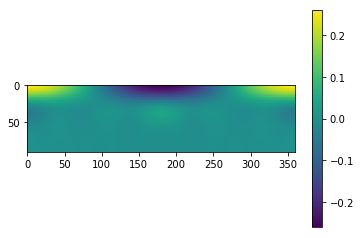

In [11]:
plot.imshow(mwa_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :].real)
plot.colorbar()

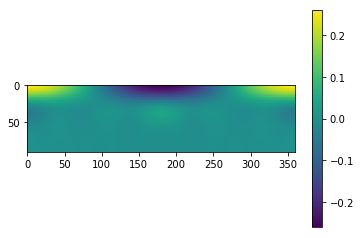

In [12]:
plot.imshow(mwapb_jones[basis_axis_index, feed_index, :].real)
plot.colorbar()

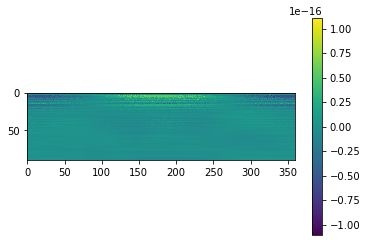

In [13]:
plot.imshow(diff[basis_axis_index, feed_index, :].real)
plot.colorbar()

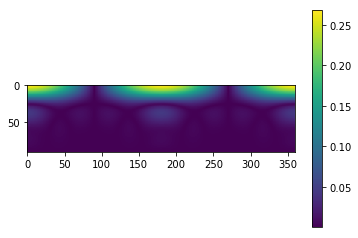

In [14]:
plot.imshow(np.abs(mwa_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :]))
plot.colorbar()

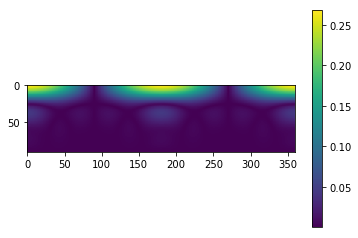

In [15]:
plot.imshow(np.abs(mwapb_jones[basis_axis_index, feed_index, :]))
plot.colorbar()

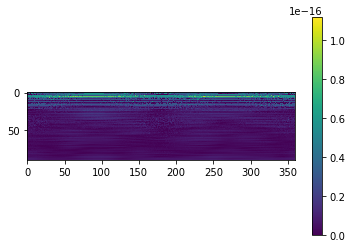

In [16]:
plot.imshow(np.abs(diff[basis_axis_index, feed_index, :]))
plot.colorbar()

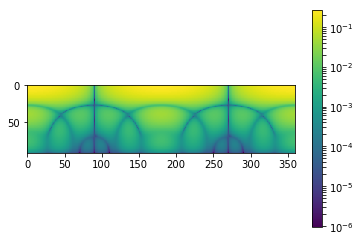

In [17]:
plot.imshow(np.abs(mwa_beam.data_array[basis_axis_index, 0, feed_index, freq_index, :]), norm=LogNorm())
plot.colorbar()

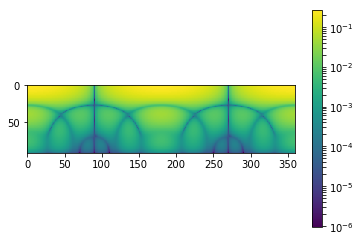

In [18]:
plot.imshow(np.abs(mwapb_jones[basis_axis_index, feed_index, :]), norm=LogNorm())
plot.colorbar()

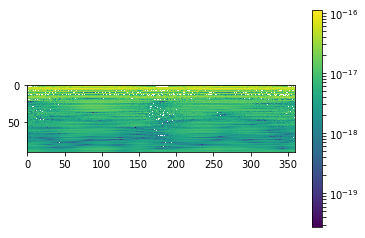

In [19]:
plot.imshow(np.abs(diff[basis_axis_index, feed_index, :]), norm=LogNorm())
plot.colorbar()

In [20]:
np.where(np.abs(diff) == np.max(np.abs(diff)))

(array([0, 0, 1, 1]),
 array([1, 1, 1, 1]),
 array([0, 0, 0, 2]),
 array([165, 345, 255,  96]))